In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [26]:
data = pd.read_csv('happiness_index.csv')
data

,Country,Happiness Score,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom
0,Switzerland,7.587,1,1.39651,1.34951,0.94143,0.66557
1,Iceland,7.561,2,1.30232,1.40223,0.94784,0.62877
2,Denmark,7.527,3,1.32548,1.36058,0.87464,0.64938
3,Norway,7.522,4,1.45900,1.33095,0.88521,0.66973
4,Canada,7.427,5,1.32629,1.32261,0.90563,0.63297
...,...,...,...,...,...,...,...
153,Rwanda,3.465,154,0.22208,0.77370,0.42864,0.59201
154,Benin,3.340,155,0.28665,0.35386,0.31910,0.48450
155,Syria,3.006,156,0.66320,0.47489,0.72193,0.15684
156,Burundi,2.905,157,0.01530,0.41587,0.22396,0.11850


In [27]:
x = data[['Happiness Score', 'Economy (GDP per Capita)', 
          'Family', 'Health (Life Expectancy)', 'Freedom']].values
x

array([[7.587  , 1.39651, 1.34951, 0.94143, 0.66557],
       [7.561  , 1.30232, 1.40223, 0.94784, 0.62877],
       [7.527  , 1.32548, 1.36058, 0.87464, 0.64938],
       [7.522  , 1.459  , 1.33095, 0.88521, 0.66973],
       [7.427  , 1.32629, 1.32261, 0.90563, 0.63297],
       [7.406  , 1.29025, 1.31826, 0.88911, 0.64169],
       [7.378  , 1.32944, 1.28017, 0.89284, 0.61576],
       [7.364  , 1.33171, 1.28907, 0.91087, 0.6598 ],
       [7.286  , 1.25018, 1.31967, 0.90837, 0.63938],
       [7.284  , 1.33358, 1.30923, 0.93156, 0.65124],
       [7.278  , 1.22857, 1.22393, 0.91387, 0.41319],
       [7.226  , 0.95578, 1.23788, 0.86027, 0.63376],
       [7.2    , 1.33723, 1.29704, 0.89042, 0.62433],
       [7.187  , 1.02054, 0.91451, 0.81444, 0.48181],
       [7.119  , 1.39451, 1.24711, 0.86179, 0.54604],
       [6.983  , 0.98124, 1.23287, 0.69702, 0.49049],
       [6.946  , 1.56391, 1.21963, 0.91894, 0.61583],
       [6.94   , 1.33596, 1.36948, 0.89533, 0.61777],
       [6.937  , 1.30782, 1.

In [28]:
dbscan=DBSCAN(eps=0.3, min_samples=3)
clusters=dbscan.fit_predict(x)
print(clusters)

[ 0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1 -1
 -1  1 -1  1 -1 -1  1  1 -1  1  1  1 -1  1  1  1  1  1 -1  2  1 -1  1  1
 -1  3  2  3 -1 -1  1 -1  2  2  1  2 -1  1  3 -1 -1 -1  2  2 -1  2  2 -1
  2  2 -1  2  2  2 -1 -1  2 -1 -1 -1  2 -1 -1 -1 -1  4 -1  4  4  4 -1 -1
 -1  4 -1 -1  4 -1  4  4 -1  4 -1 -1 -1 -1]


Outlier:  ['Costa Rica' 'Mexico' 'Qatar' 'Kuwait' 'Suriname' 'Kosovo' 'Hong Kong'
 'Estonia' 'Vietnam' 'Kyrgyzstan' 'Nigeria' 'Pakistan' 'Zambia'
 'Somaliland region' 'Mozambique' 'Lesotho' 'Swaziland' 'Greece' 'Hungary'
 'Bangladesh' 'Iraq' 'South Africa' 'Ghana' 'India' 'Congo (Kinshasa)'
 'Sierra Leone' 'Armenia' 'Botswana' 'Georgia' 'Malawi' 'Sri Lanka'
 'Bulgaria' 'Egypt' 'Yemen' 'Angola' 'Congo (Brazzaville)' 'Gabon' 'Niger'
 'Cambodia' 'Madagascar' 'Central African Republic' 'Guinea' 'Afghanistan'
 'Benin' 'Syria' 'Burundi' 'Togo'] 

Cluster 1:  ['Switzerland' 'Iceland' 'Denmark' 'Norway' 'Canada' 'Finland'
 'Netherlands' 'Sweden' 'New Zealand' 'Australia' 'Israel' 'Austria'
 'United States' 'Brazil' 'Luxembourg' 'Ireland' 'Belgium'
 'United Arab Emirates' 'United Kingdom' 'Oman' 'Venezuela' 'Singapore'
 'Panama' 'Germany' 'Chile' 'France' 'Argentina' 'Czech Republic'
 'Uruguay' 'Colombia' 'Thailand' 'Saudi Arabia' 'Spain' 'Malta' 'Taiwan'] 

Cluster 2:  ['Trinidad and Tobago' '

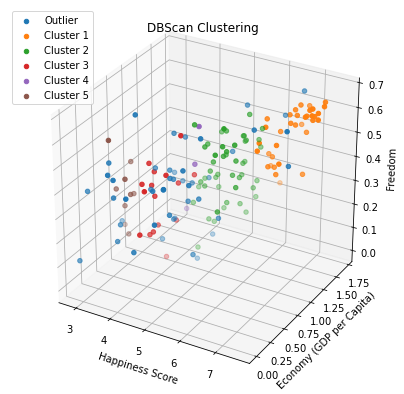

In [29]:
for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    country = data.iloc[clusters == i, 0]
    print(label + ': ', country.values, '\n')


plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')

for i in np.unique(clusters):
    label = 'Outlier' if i == -1 else 'Cluster ' + str(i + 1)
    rows_by_cluster = x[clusters == i]
    ax.scatter3D(rows_by_cluster[:,0], rows_by_cluster[:,1],
             rows_by_cluster[:,4], label=label)

plt.title("DBScan Clustering")
ax.set_xlabel(data.columns[1])
ax.set_ylabel(data.columns[3])
ax.set_zlabel(data.columns[6])

plt.legend()
plt.show()